In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


In [11]:
# Calculate the date 1 year ago from the last data point in the database
lastday = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(lastday)
oneyearago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(oneyearago)

('2017-08-23',)
2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores
yearprecip = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-23', Measurement.date <= '2017-08-23').\
        order_by(Measurement.date).all()
yearprecip

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
yearprecip = pd.DataFrame(data=yearprecip)
yearprecip.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [14]:
# Sort the dataframe by date

#The data frame is sorted by data already 

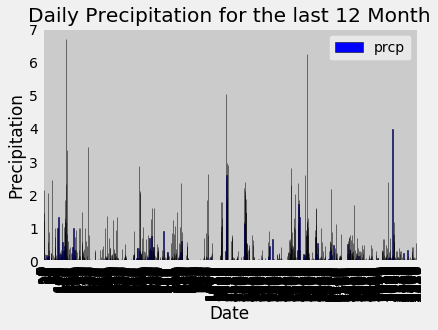

<Figure size 432x288 with 0 Axes>

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
precipchart = yearprecip.plot(kind='bar', facecolor='blue', edgecolor='black')
plt.title("Daily Precipitation for the last 12 Month")
precipchart.set_xlabel("Date")
precipchart.set_ylabel("Precipitation")

#plt.savefig("Daily_Precip.png")
plt.show()
plt.tight_layout()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
yearprecip.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
countofstations = session.query(func.count(Station.station)).all()
f'There are {countofstations} stations in this dataset'

'There are [(9,)] stations in this dataset'

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations = []

orderstations = session.query(Measurement.station, func.count(Measurement.date)).filter(Measurement.station == Station.station).group_by(Measurement.station)\
.order_by(desc(func.count(Measurement.date))).all()
for i in orderstations:
    (station, date_count) = i
    stations.append(i)
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
                
session.query(*sel).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

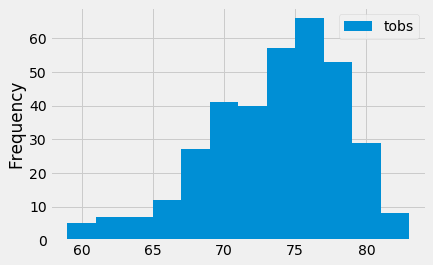

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement.tobs).\
                                filter(Measurement.station=='USC00519281').\
                                filter(Measurement.date >= oneyearago).\
                                order_by(Measurement.date.desc()).all()

x = [x[0] for x in histogram]


plt.hist(x, bins=12)
plt.ylabel('Frequency')
plt.legend(['tobs'])
plt.show()

## Bonus Challenge Assignment

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
#My vacation dates will be from 2015-04-25 to 2015-05-02
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2015-04-25', '2015-05-02'))

[(68.0, 74.14, 83.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacation = calc_temps('2014-04-25', '2014-05-02')
print(vacation)

[(63.0, 70.98181818181818, 80.0)]


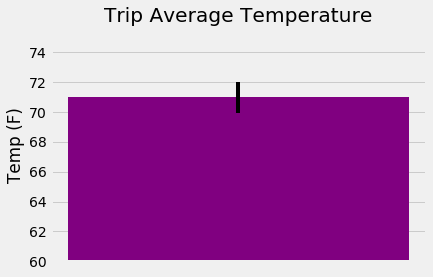

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower = vacation[0][1] - vacation[0][0]
upper = vacation[0][2] - vacation[0][1]

plt.bar(0, vacation[0][1], yerr=[upper-lower], color='purple')
plt.title('Trip Average Temperature')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)

plt.show()

In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= "2014-04-25")\
.filter(Measurement.date <= "2014-05-02")\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

for row in rainfall:
    rain="{0:.2f}".format(row[1])
    print (f"Station:{row[0]} Rainfall:{rain} Location: {row[2]} Elevation: {row[3]} Latitude:{row[4]} Longitude: {row[5]}")
    print()


Station:USC00516128 Rainfall:5.39 Location: MANOA LYON ARBO 785.2, HI US Elevation: 152.4 Latitude:21.3331 Longitude: -157.8025

Station:USC00519281 Rainfall:1.98 Location: WAIHEE 837.5, HI US Elevation: 32.9 Latitude:21.45167 Longitude: -157.84888999999998

Station:USC00513117 Rainfall:1.39 Location: KANEOHE 838.1, HI US Elevation: 14.6 Latitude:21.4234 Longitude: -157.8015

Station:USC00514830 Rainfall:0.55 Location: KUALOA RANCH HEADQUARTERS 886.9, HI US Elevation: 7.0 Latitude:21.5213 Longitude: -157.8374

Station:USC00519523 Rainfall:0.43 Location: WAIMANALO EXPERIMENTAL FARM, HI US Elevation: 19.5 Latitude:21.33556 Longitude: -157.71139

Station:USC00511918 Rainfall:0.24 Location: HONOLULU OBSERVATORY 702.2, HI US Elevation: 0.9 Latitude:21.3152 Longitude: -157.9992

Station:USC00519397 Rainfall:0.10 Location: WAIKIKI 717.2, HI US Elevation: 3.0 Latitude:21.2716 Longitude: -157.8168

Station:USC00517948 Rainfall:0.00 Location: PEARL CITY, HI US Elevation: 11.9 Latitude:21.3934 Lo

In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [41]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
startdate = '2015-04-25'
enddate ='2015-05-02'
# Set the start and end date of the trip
dates = session.query(Measurement.date).filter(Measurement.date >= startdate).filter(Measurement.date <= enddate).group_by(Measurement.date).all()

# Use the start and end date to create a range of dates
tripdates = [x[0] for x in dates]

# Stip off the year and save a list of %m-%d strings
tripdatesnoyear= [x[5:] for x in tripdates]

# Loop through the list of %m-%d strings and calculate the normals for each date

daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= tripdatesnoyear[0])
                 .filter(func.strftime("%m-%d", Measurement.date) <= tripdatesnoyear[-1]).group_by
                 (func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
daily_normals

[(66.0, 73.96551724137932, 83.0),
 (66.0, 74.01724137931035, 81.0),
 (65.0, 72.87272727272727, 81.0),
 (63.0, 73.46428571428571, 79.0),
 (66.0, 73.30357142857143, 81.0),
 (58.0, 71.5576923076923, 78.0),
 (65.0, 72.75925925925925, 79.0),
 (65.0, 73.05084745762711, 79.0)]

In [45]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Create a dataframe from the previous query 
daily_normals_df= pd.DataFrame(daily_normals,columns=['tmin', 'tavg', 'tmax'])
daily_normals_df['date']= tripdates
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'])
daily_normals_df.set_index('date',inplace=True)

daily_normals_df

,tmin,tavg,tmax
date,,,
2015-04-25,66.0,73.965517,83.0
2015-04-26,66.0,74.017241,81.0
2015-04-27,65.0,72.872727,81.0
2015-04-28,63.0,73.464286,79.0
2015-04-29,66.0,73.303571,81.0
2015-04-30,58.0,71.557692,78.0
2015-05-01,65.0,72.759259,79.0
2015-05-02,65.0,73.050847,79.0


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
